# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import os

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, MetaData, Table

In [4]:
emoji = os.path.join("Resources", "emoji.sqlite")
# Create an engine for the `emoji.sqlite` database
engine = create_engine(f"sqlite:///{emoji}", echo=False)

## Explore Database

In [9]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['emoji']

In [12]:
# Use Inspector to print the column names and types
columns = inspector.get_columns("emoji")
for column in columns:
    print(column["name"], "\t", column["type"])

id 	 INTEGER
emoji_char 	 TEXT
emoji_id 	 TEXT
name 	 TEXT
score 	 INTEGER


In [11]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
first_10 = engine.execute('SELECT * FROM emoji LIMIT 10') # add .fetchall() method???
for row in first_10:
    print(row)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect Database and Query

In [13]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [14]:
# Start a session to query the database
session = Session(engine)

## Query to get the Emoji Data

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [22]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query results
results = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).order_by(Emoji.score.desc()).all()
results

447', 36924974),
 ('2️⃣', '0032-20E3', 36389557),
 ('👎', '1F44E', 35779058),
 ('💃', '1F483', 35537189),
 ('🔫', '1F52B', 35127839),
 ('🔴', '1F534', 34949546),
 ('💫', '1F4AB', 34331927),
 ('↪️', '21AA', 33725488),
 ('💥', '1F4A5', 31687749),
 ('👅', '1F445', 31561395),
 ('↩️', '21A9', 31265883),
 ('💭', '1F4AD', 30703227),
 ('✊', '270A', 30436225),
 ('©', '00A9', 29288506),
 ('✈️', '2708', 29088464),
 ('💩', '1F4A9', 28739244),
 ('😰', '1F630', 28662212),
 ('😹', '1F639', 28086059),
 ('🙅', '1F645', 27772946),
 ('◀️', '25C0', 27520793),
 ('🍃', '1F343', 27297747),
 ('🌞', '1F31E', 26637811),
 ('💦', '1F4A6', 26459413),
 ('🙆', '1F646', 26065980),
 ('💎', '1F48E', 26052152),
 ('⚡️', '26A1', 25184506),
 ('⭐️', '2B50', 25121321),
 ('💤', '1F4A4', 24579270),
 ('🎈', '1F388', 24256440),
 ('‼️', '203C', 24175977),
 ('🍕', '1F355', 24148812),
 ('👻', '1F47B', 23687070),
 ('🍀', '1F340', 23632134),
 ('🎤', '1F3A4', 23447396),
 ('⚽️', '26BD', 23228233),
 ('😟', '1F61F', 22313732),
 ('😨', '1F628', 22242378),
 ('🚶', 

Unpack tuples using list comprehensions

In [31]:
# Unpack the "Top 10" `emoji_id` and `scores` from results and save into separate lists.
top10 = results[0:10]
# top10
emoji_id = [result[1] for result in results[:10]]
scores = [int(result[2]) for result in results[:10]]
emoji_id, scores

(['1F602',
  '2764',
  '1F60D',
  '2665',
  '1F62D',
  '1F60A',
  '267B',
  '1F612',
  '1F495',
  '1F618'],
 [1814832150,
  840619939,
  680382416,
  652715459,
  515991922,
  484540701,
  452489849,
  441690175,
  381679908,
  377847645])

## Plot using Matplotlib

<BarContainer object of 10 artists>

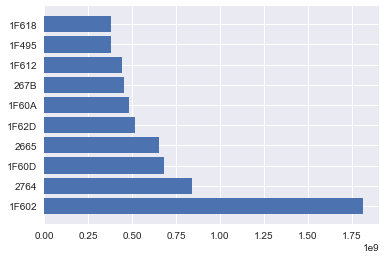

In [32]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
plt.barh(emoji_id, scores)

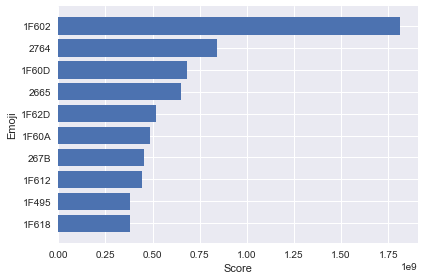

In [33]:
# Demonstrated answer
fig, ax = plt.subplots()
ypos = range(1, len(scores)+1)
ax.barh(ypos, scores[::-1])
ax.set_xlabel("Score")
ax.set_ylabel("Emoji")
ax.set_yticks(ypos)
ax.set_yticklabels(emoji_id[::-1])
fig.tight_layout()
plt.show()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [39]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
emoji_df = pd.DataFrame(results[:10], columns=["Char", "ID", "Score"])
emoji_df.set_index("ID", inplace=True)
emoji_df.head(10)

,Char,Score
ID,,
1F602,😂,1814832150
2764,❤️,840619939
1F60D,😍,680382416
2665,♥️,652715459
1F62D,😭,515991922
1F60A,😊,484540701
267B,♻️,452489849
1F612,😒,441690175
1F495,💕,381679908


Plot using Pandas

<AxesSubplot:ylabel='ID'>

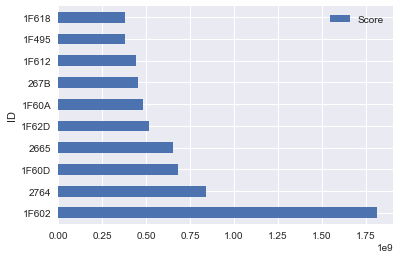

In [40]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
emoji_df.plot.barh()

In [ ]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE